# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [88]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [89]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?&units=metric&appid={weather_api_key}'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data 
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city 
    city_url = f'{url}&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s," % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    response = requests.get(city_url).json()   
  
    try:
        # Parse the JSON and retrieve data
        
        #pprint.pp(city_url_json)
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['temp_min']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | benghazi,
Processing Record 2 of Set 1 | mount gambier,
Processing Record 3 of Set 1 | hamilton,
Processing Record 4 of Set 1 | port-aux-francais,
Processing Record 5 of Set 1 | grytviken,
Processing Record 6 of Set 1 | shenjiamen,
Processing Record 7 of Set 1 | iqaluit,
Processing Record 8 of Set 1 | thompson,
Processing Record 9 of Set 1 | hun,
Processing Record 10 of Set 1 | ribeira grande,
Processing Record 11 of Set 1 | sisimiut,
Processing Record 12 of Set 1 | albany,
Processing Record 13 of Set 1 | maine soroa,
Processing Record 14 of Set 1 | st. john's,
Processing Record 15 of Set 1 | ouled mimoun,
Processing Record 16 of Set 1 | selfoss,
Processing Record 17 of Set 1 | badger,
Processing Record 18 of Set 1 | tiksi,
Processing Record 19 of Set 1 | ilulissat,
Processing Record 20 of Set 1 | jamestown,
Processing Record 21 of Set 1 | hermanus,
Processing Record 22 of Set 1 | ta'izz,
Process

In [90]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [91]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,benghazi,32.1167,20.0667,14.43,14.43,99,5.28,LY,1738794437
1,mount gambier,-37.8333,140.7667,20.12,20.12,10,2.60,AU,1738794717
2,hamilton,39.1834,-84.5333,1.07,-0.69,100,3.09,US,1738794718
3,port-aux-francais,-49.3500,70.2167,7.39,7.39,99,8.84,TF,1738794719
4,grytviken,-54.2811,-36.5092,1.62,1.62,98,4.36,GS,1738794720


In [92]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [93]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,benghazi,32.1167,20.0667,14.43,14.43,99,5.28,LY,1738794437
1,mount gambier,-37.8333,140.7667,20.12,20.12,10,2.60,AU,1738794717
2,hamilton,39.1834,-84.5333,1.07,-0.69,100,3.09,US,1738794718
3,port-aux-francais,-49.3500,70.2167,7.39,7.39,99,8.84,TF,1738794719
4,grytviken,-54.2811,-36.5092,1.62,1.62,98,4.36,GS,1738794720


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

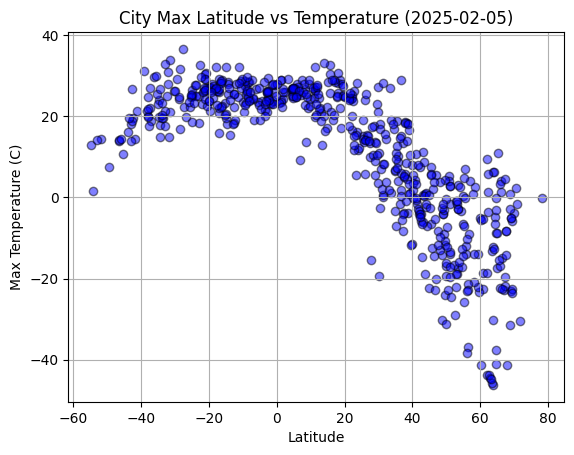

In [94]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], linewidths=1, c='b', edgecolors='k', alpha=.5)

#Coverting from unix to datetime
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')
tm_stp = city_data_df['Date'].max()
date_only = tm_stp.date()

# Incorporate the other graph properties
plt.title('City Max Latitude vs Temperature (' + str(date_only) + ')')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

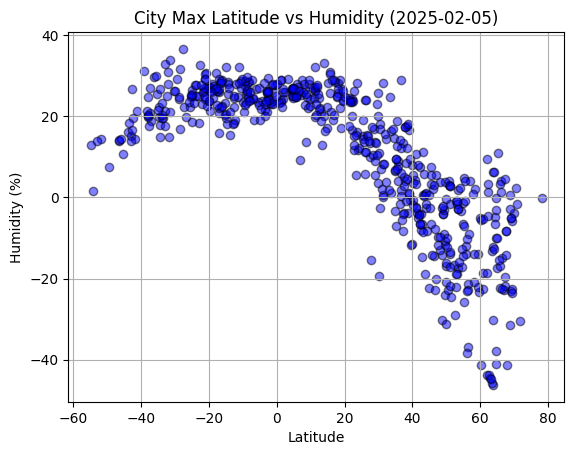

In [95]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], linewidths=1, c='b', edgecolors='k', alpha=.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Humidity (' + str(date_only) + ')')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

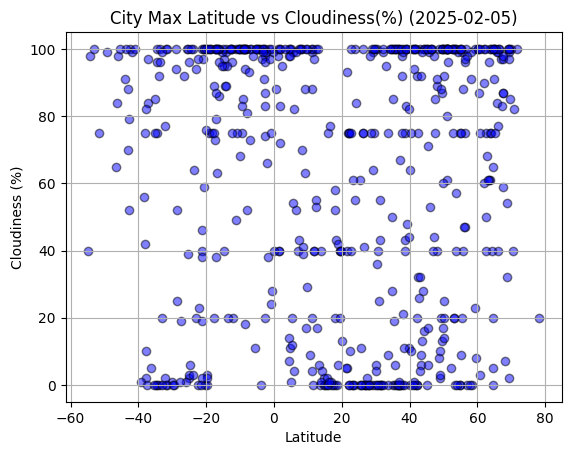

In [96]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], linewidths=1, c='b', edgecolors='k', alpha=.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Cloudiness(%) (' + str(date_only) + ')')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

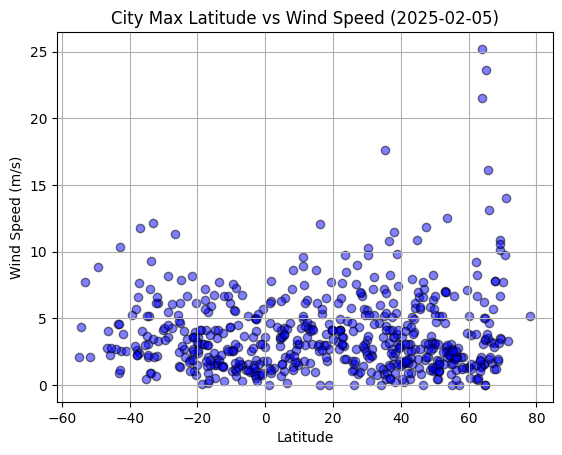

In [97]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], linewidths=1, c='b', edgecolors='k', alpha=.5)

# Incorporate the other graph properties
plt.title('City Max Latitude vs Wind Speed (' + str(date_only) + ')')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [98]:
# Define a function to create Linear Regression plots
def linreg(x,y,a,b): 
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_line = slope * x + intercept
    plt.plot(x, regress_line, c='r')
    equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
    plt.annotate(equation, (.5,.5), fontsize=15, color='red', annotation_clip=False, bbox=dict(facecolor='white'))
    xlab = northern_hemi_df.columns[a]
    ylab = northern_hemi_df.columns[b]
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.scatter(x, y, linewidths=1, c='b', edgecolors='k', alpha=.5)
    plt.title(f'{xlab} vs. {ylab}')
    plt.grid()
    print(f'The r^2 value is: {r_value}')
    plt.show()
    print(f'{xlab} {ylab}')

In [99]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]
northern_hemi_df.rename(columns={'Lat' : 'Latitude'}, inplace=True)
# Display sample data
northern_hemi_df.head()

C:\Users\bates\AppData\Local\Temp\ipykernel_10744\3197029551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northern_hemi_df.rename(columns={'Lat' : 'Latitude'}, inplace=True)


,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,benghazi,32.1167,20.0667,14.43,14.43,99,5.28,LY,2025-02-05 22:27:17
2,hamilton,39.1834,-84.5333,1.07,-0.69,100,3.09,US,2025-02-05 22:31:58
5,shenjiamen,29.9576,122.2980,3.65,3.65,6,3.40,CN,2025-02-05 22:32:01
6,iqaluit,63.7506,-68.5145,-30.15,-30.15,75,2.06,CA,2025-02-05 22:32:02
7,thompson,55.7435,-97.8558,-13.91,-13.91,40,6.69,CA,2025-02-05 22:32:03


In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
southern_hemi_df.rename(columns={'Lat' : 'Latitude'}, inplace=True)
# Display sample data
southern_hemi_df.head()

C:\Users\bates\AppData\Local\Temp\ipykernel_10744\1501214635.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southern_hemi_df.rename(columns={'Lat' : 'Latitude'}, inplace=True)


,City,Latitude,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mount gambier,-37.8333,140.7667,20.12,20.12,10,2.60,AU,2025-02-05 22:31:57
3,port-aux-francais,-49.3500,70.2167,7.39,7.39,99,8.84,TF,2025-02-05 22:31:59
4,grytviken,-54.2811,-36.5092,1.62,1.62,98,4.36,GS,2025-02-05 22:32:00
20,hermanus,-34.4187,19.2345,14.89,14.89,96,5.14,ZA,2025-02-05 22:32:17
25,puerto natales,-51.7236,-72.4875,14.25,14.25,75,2.06,CL,2025-02-05 22:32:22


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: -0.814077542341871


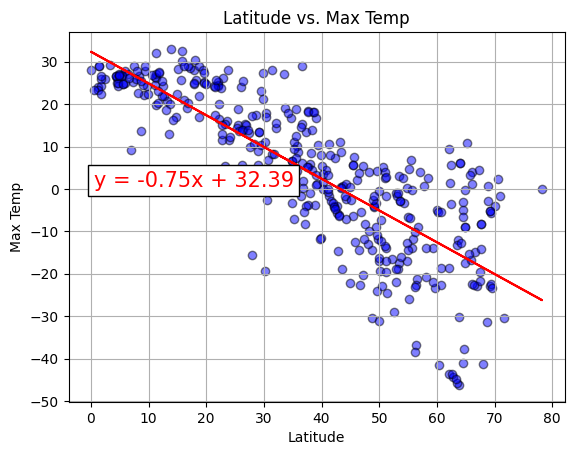

Latitude Max Temp


In [101]:
# Linear regression on Northern Hemisphere
linreg(northern_hemi_df['Latitude'],northern_hemi_df['Max Temp'],1,3)

The r^2 value is: 0.42998974343660806


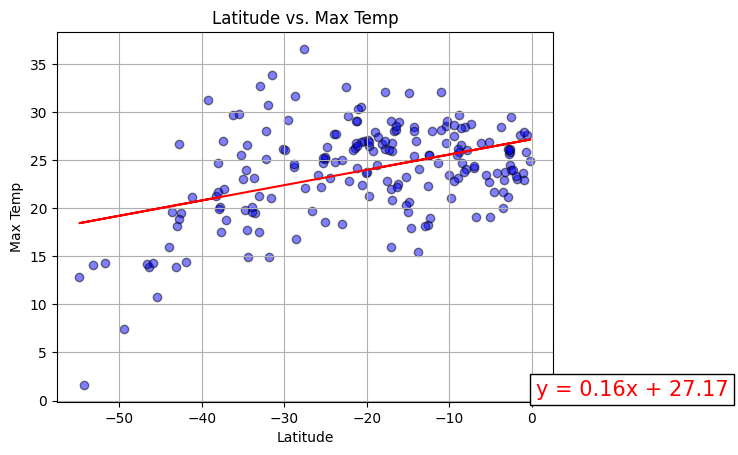

Latitude Max Temp


In [102]:
# Linear regression on Southern Hemisphere
plt.clf()
linreg(southern_hemi_df['Latitude'],southern_hemi_df['Max Temp'],1,3)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [103]:
print('At first look it would seem that as you approach the equator, the maximum temperature increases. \nIt is my opinion this data is too specific (does not show a large enough disparity in time to be usable')

At first look it would seem that as you approach the equator, the maximum temperature increases. 
It is my opinion this data is too specific (does not show a large enough disparity in time to be usable


### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: -0.8170541408692843


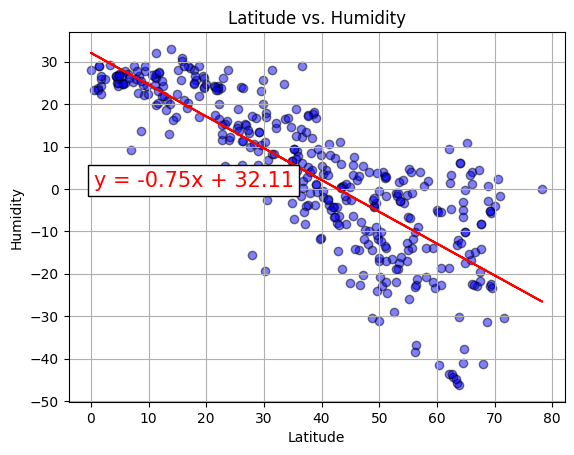

Latitude Humidity


In [104]:
# Northern Hemisphere
plt.clf()
linreg(northern_hemi_df['Latitude'],northern_hemi_df['Humidity'],1,4)

The r^2 value is: 0.443182135140541


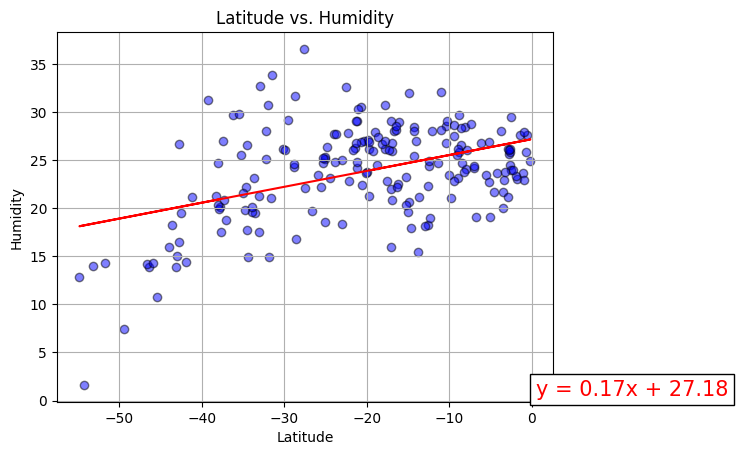

Latitude Humidity


In [105]:
# Southern Hemisphere
linreg(southern_hemi_df['Latitude'],southern_hemi_df['Humidity'],1,4)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [106]:
print('R value is too low to be considered relevant. It would be better to look at data over longer period of time.')

R value is too low to be considered relevant. It would be better to look at data over longer period of time.


### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.19178744542987414


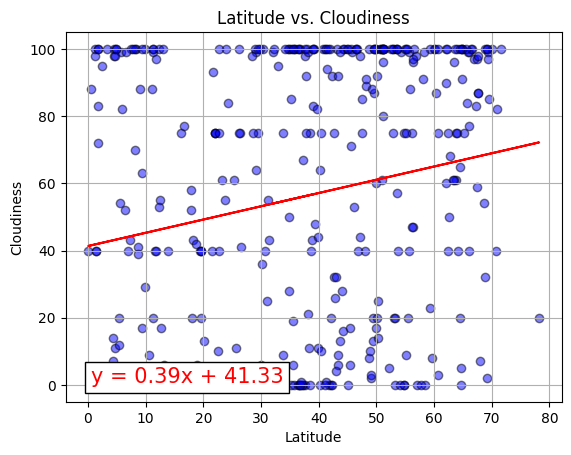

Latitude Cloudiness


In [107]:
# Northern Hemisphere
northern_hemi_df.head()
linreg(northern_hemi_df['Latitude'],northern_hemi_df['Cloudiness'],1,5)

The r^2 value is: 0.21321217725028727


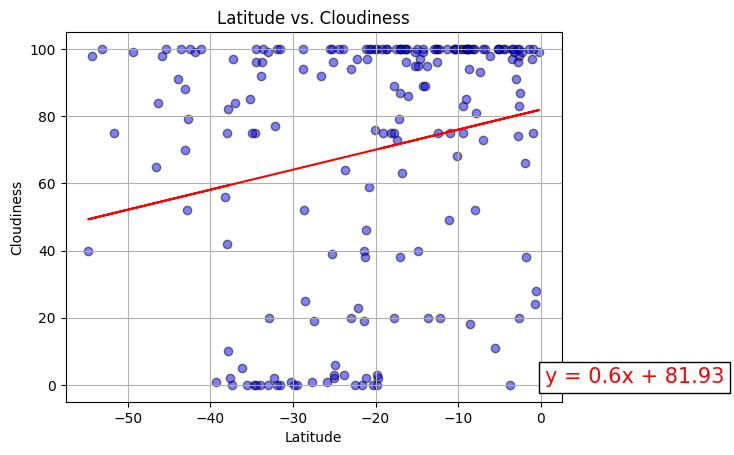

Latitude Cloudiness


In [108]:
# Southern Hemisphere
linreg(southern_hemi_df['Latitude'],southern_hemi_df['Cloudiness'],1,5)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [109]:
print('There is no clear relation between cloudiness and latitude. This is the same issue as in the previous graphs')

There is no clear relation between cloudiness and latitude. This is the same issue as in the previous graphs


### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.19178744542987414


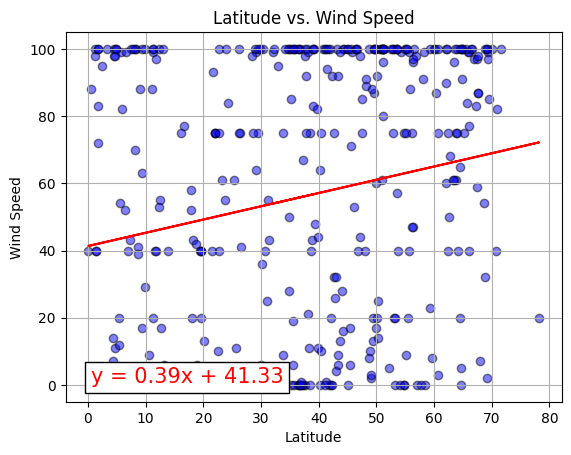

Latitude Wind Speed


In [110]:
# Northern Hemisphere
southern_hemi_df.head()
linreg(northern_hemi_df['Latitude'],northern_hemi_df['Cloudiness'],1,6)

The r^2 value is: 0.21321217725028727


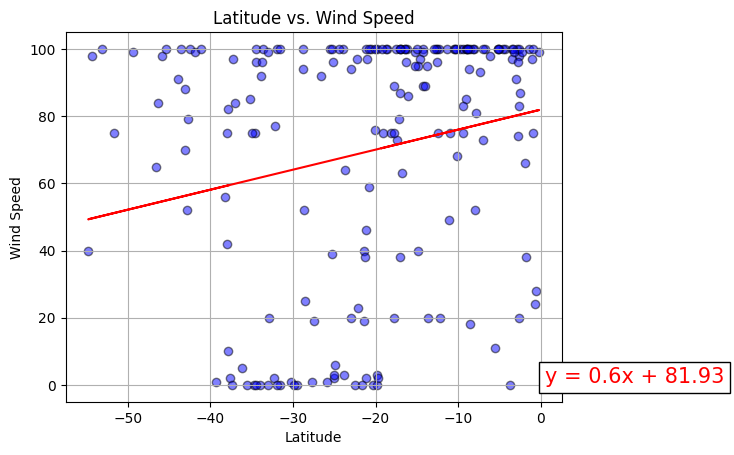

Latitude Wind Speed


In [111]:
# Southern Hemisphere
linreg(southern_hemi_df['Latitude'],southern_hemi_df['Cloudiness'],1,6)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [112]:
print('Data is unreliable; R value too low')

Data is unreliable; R value too low
